<a href="https://colab.research.google.com/github/rezabanaei/Machine_Learning/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Regression

In this section, we will try to solve the problem of Regression. In our first step, we will atack the problem from the analytical view.
Generate Synthetic Data

We will use rather simple line of y=3x+8
with noise of epsilon=5 to generate test and train data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

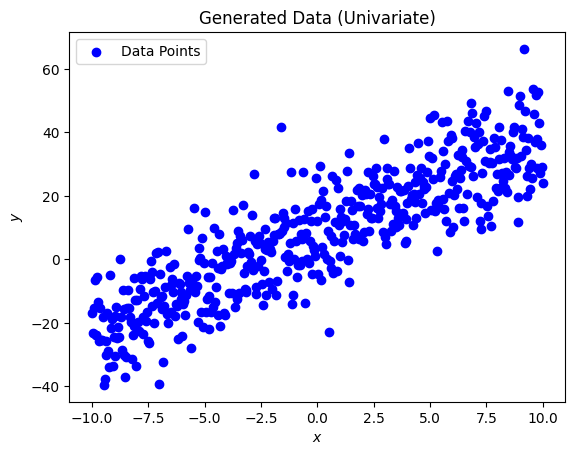

In [18]:
X, y = generate_data(n=500, noise=10.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()


Linear Regression: Analytical Solution

Implement the Closed-Form Solution

In [19]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x ایکس جدید بدهیم متراژ خونه را بدست میاره

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[1]:.2f}, w_0 = {w[0]:.2f}")

Parameters (w): 
w_1 = 3.04, w_0 = 8.07


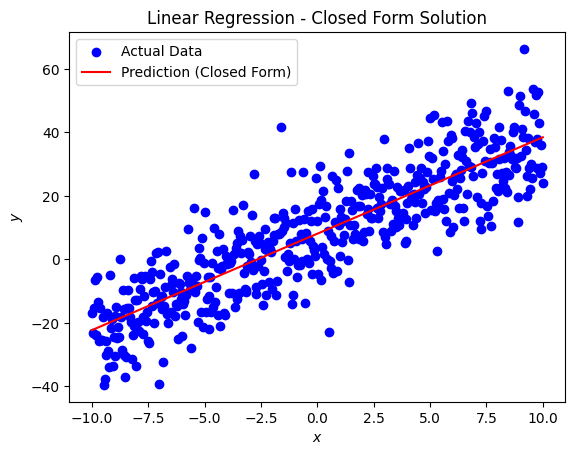

In [20]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

Polynomial Regression: Analytical Solution

Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.

Engineering Polynomial Features

In [21]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly


Implement Polynomial Regression


In [22]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")

Parameters (w) for Degree 5: [ 8.84400439e+00  2.89676575e+00 -2.27787664e-02  6.78412656e-03
 -6.59157755e-06 -6.21503884e-05]


Visualize the Polynomial Fit

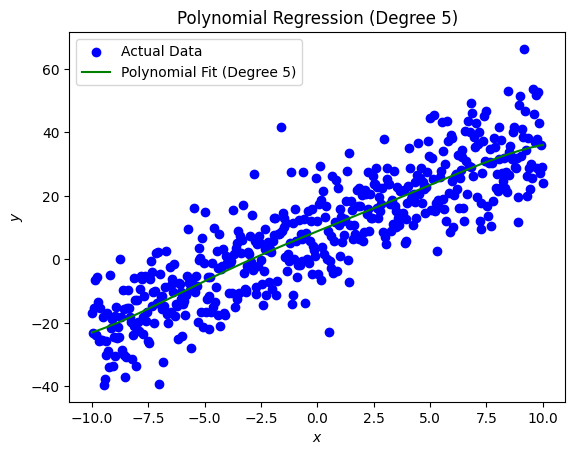

In [23]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()